
## New York City (NYC) public school

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [116]:
# import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read in the data
df=pd.read_csv('schools.csv')
# Preview the data
df.head()
# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


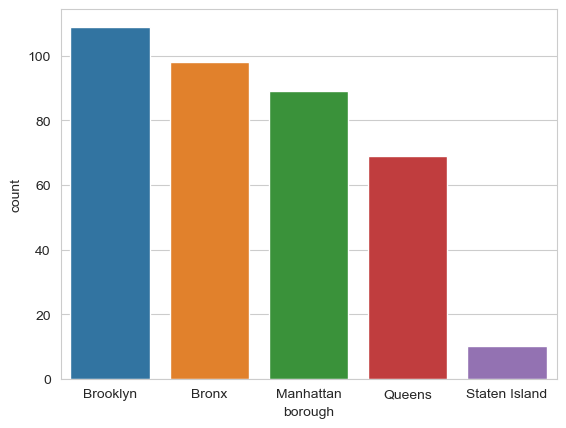

In [135]:
# count number of total schools per borough
category_order = ['Brooklyn','Bronx','Manhattan','Queens','Staten Island']
sns.countplot(x='borough', data=df, order=category_order)
sns.set_style("darkgrid")
plt.show()

In [119]:
# Which schools are best for math? The best math results are at least 80% of the *maximum possible score of 800* for math.
best_grade=800*0.8

#              FILTER                           SELECT_COLUMNS                       SORT_METHOD
df[ df['average_math' ] > best_grade ][['school_name','average_math']].sort_values(by='average_math', ascending=False)

#               boolean_mask                      list                           method

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


In [120]:
# Calculate total_SAT per school, combined SAT scores?
df['total_sat'] = df['average_math'] + df['average_reading'] + df['average_writing']
df['total_sat']


0      1859
1      1193
2      1261
3      1529
4      1197
       ... 
370    1086
371    1114
372    1280
373    1207
374    1716
Name: total_sat, Length: 375, dtype: int64

In [ ]:
sns.scatterplot(x='', y='', data=df, )

In [133]:
df[df['borough']=='Manhattan']['total_sat'].max()

2144

In [122]:
# Who are the top 10 performing schools?
#              SORT_METHOD                             SELECT_COLUMNS         LIMIT 
#df.sort_values(by='total_sat', ascending=False)[['school_name','total_sat']].head(10)

#         SELECT COLUMNS                     SORT METHOD                       LIMIT
df_top10=df[['borough','school_name','total_sat']].sort_values(by='total_sat', ascending=False).head(10)
df_top10

,borough,school_name,total_sat
88,Manhattan,Stuyvesant High School,2144
170,Bronx,Bronx High School of Science,2041
93,Staten Island,Staten Island Technical High School,2041
174,Bronx,High School of American Studies at Lehman College,2013
333,Queens,Townsend Harris High School,1981
365,Queens,Queens High School for the Sciences at York Co...,1947
5,Manhattan,Bard High School Early College,1914
280,Brooklyn,Brooklyn Technical High School,1896
45,Manhattan,Eleanor Roosevelt High School,1889
68,Manhattan,"High School for Mathematics, Science, and Engi...",1889


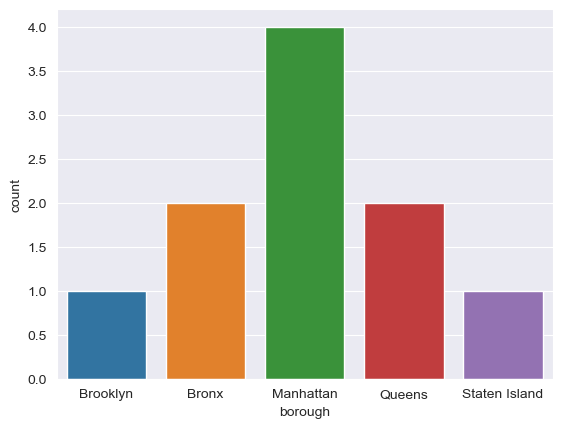

In [137]:
# count number of schools from top 10 list per borough
sns.countplot(x='borough', data=df_top10, order=category_order)
sns.set_style("darkgrid")
plt.show()

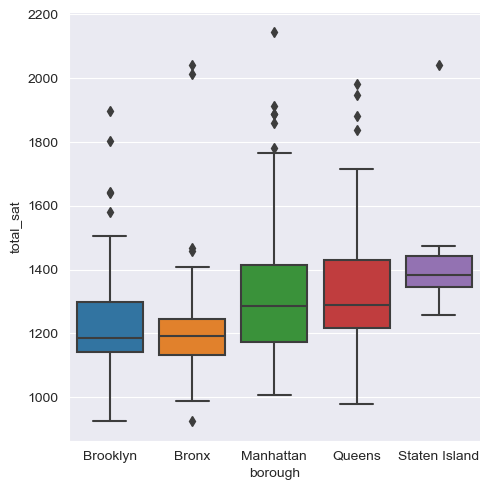

In [136]:

sns.catplot(x='borough',y='total_sat', data=df, kind='box', order=category_order)
sns.set_style("darkgrid")
plt.show()

In [88]:
# Which NYC borough has the highest standard deviation for total_SAT?

df.groupby('borough')[['total_sat']].std().sort_values('total_sat', ascending=False).head(1).round(2)

,total_sat
borough,
Manhattan,230.29


In [104]:
# Filter for max std and make borough a column
df_std=df.groupby('borough')['total_sat'].agg(['count','mean','std']).round(2)
high=df_std[df_std['std']==df_std['std'].max()]
high

,count,mean,std
borough,,,
Manhattan,89,1340.13,230.29


In [106]:
# Rename the columns for clarity
high=high.rename(columns={'count':'number_schools', 'mean':'average_SAT', 'std':'Standar_desviation_SAT',})
high

,number_schools,average_SAT,Standar_desviation_SAT
borough,,,
Manhattan,89,1340.13,230.29


el distrito que tiene mayor numero de escuelas es brooklyn  y sin embargo es la que peor calificaciones tienes
su mediana esta por abajo de la puntuacion 1200 total SAT, solo cuatro escuelas destacan

del top 10 hay 4 escuelas que son de manhathan, el doble que los otros cuatro distritos, es el tercer distrito con mas escuelas, cerca de
90, su mediana esta cerca de los 1300 de puntuacion SAT

la ciudad que tiene en general mejores calificaciones es staten island pues su mediana esta cerca de los 1400 y su minimo esta por arriba de
los 1200, aunque si bien es cierto es dnde menos escuelas hay, pues hay cerca de 10 escuelas, mientras Manhattan tiene mas de 80

Las mejores ciudades son Manhattan y Queens, las peores son Brooklyn y Bronx

las escuelas con calificaciones altas son puros aoutlayers
